In [39]:
# CO2 Emissions in Africa from 2000 to 2020. This dataset is a collection of key metrics from notable sources and Datasets.

In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("co2.csv")

In [42]:
df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


In [43]:
df.shape

(1134, 20)

In [44]:
#checking null - naan values
df.isnull().sum()

,0
Country,0
Sub-Region,0
Code,0
Year,0
Population,0
GDP PER CAPITA (USD),27
GDP PER CAPITA PPP (USD),48
Area (Km2),0
Transportation (Mt),12
Total CO2 Emission including LUCF (Mt),0


In [45]:
df.columns

Index(['Country', 'Sub-Region', 'Code', 'Year', 'Population',
       'GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)', 'Area (Km2)',
       'Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)',
       'Total CO2 Emission excluding LUCF (Mt)', 'Other Fuel Combustion (Mt)',
       'Manufacturing/Construction (Mt)', 'Land-Use Change and Forestry (Mt)',
       'Industrial Processes (Mt)', 'Fugitive Emissions (Mt)', 'Energy (Mt)',
       'Electricity/Heat (Mt)', 'Bunker Fuels (Mt)', 'Building (Mt)'],
      dtype='object')

In [46]:
#Removing the most column with too many missing values
df_clean = df.drop('Fugitive Emissions (Mt)', axis=1)

In [47]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns in the dataframe:")
print(numerical_cols)

Numerical columns in the dataframe:
['Year', 'Population', 'GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)', 'Area (Km2)', 'Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)', 'Total CO2 Emission excluding LUCF (Mt)', 'Other Fuel Combustion (Mt)', 'Manufacturing/Construction (Mt)', 'Land-Use Change and Forestry (Mt)', 'Industrial Processes (Mt)', 'Fugitive Emissions (Mt)', 'Energy (Mt)', 'Electricity/Heat (Mt)', 'Bunker Fuels (Mt)', 'Building (Mt)']


In [48]:
# Remove Year and Fugitive Emissions from numerical columns because Fugitive Emissions have the most Naan values
pca_columns = [col for col in numerical_cols
               if col not in ['Year', 'Fugitive Emissions (Mt)']]

print("Selected columns for PCA:")
for i, col in enumerate(pca_columns, 1):
    missing = df[col].isna().sum()
    print(f"{i:2d}. {col}: {missing} missing values")

print(f"\nTotal columns: {len(pca_columns)}")

Selected columns for PCA:
 1. Population: 0 missing values
 2. GDP PER CAPITA (USD): 27 missing values
 3. GDP PER CAPITA PPP (USD): 48 missing values
 4. Area (Km2): 0 missing values
 5. Transportation (Mt): 12 missing values
 6. Total CO2 Emission including LUCF (Mt): 0 missing values
 7. Total CO2 Emission excluding LUCF (Mt): 0 missing values
 8. Other Fuel Combustion (Mt): 12 missing values
 9. Manufacturing/Construction (Mt): 12 missing values
10. Land-Use Change and Forestry (Mt): 0 missing values
11. Industrial Processes (Mt): 62 missing values
12. Energy (Mt): 0 missing values
13. Electricity/Heat (Mt): 12 missing values
14. Bunker Fuels (Mt): 12 missing values
15. Building (Mt): 12 missing values

Total columns: 15


In [65]:
# Fill with median the missing data(better for skewed data)
df_imputed = df_clean.copy()
for col in pca_columns:
    if df_imputed[col].isna().sum() > 0:
        col_median = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(col_median)
        print(f"Filled {col} with median: {col_median:.2f}")

Filled GDP PER CAPITA (USD) with median: 1009.49
Filled GDP PER CAPITA PPP (USD) with median: 2544.63
Filled Transportation (Mt) with median: 1.06
Filled Other Fuel Combustion (Mt) with median: 0.03
Filled Manufacturing/Construction (Mt) with median: 0.32
Filled Industrial Processes (Mt) with median: 0.08
Filled Electricity/Heat (Mt) with median: 0.30
Filled Bunker Fuels (Mt) with median: 0.15
Filled Building (Mt) with median: 0.12


In [50]:
# Verify no missing values remain
print("Final missing values check:")
print(df_imputed[pca_columns].isna().sum())

print(f"\nDataset shape: {df_imputed.shape}")
print(f"Total rows preserved: {len(df_imputed)}")

Final missing values check:
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Energy (Mt)                               0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
dtype: int64

Dataset shape: (1134, 19)
Total rows preserved: 1134


In [51]:
#extracting numerical columns datas
data = df_imputed[pca_columns].values

In [52]:
#computing the mean and standard deviation for each column
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

In [53]:
#standardizing the data
standardazed_data = (data - means) / stds

In [54]:
standardazed_data[:5]

array([[ 0.38317864, -0.13970224,  0.597232  ,  3.05168117,  1.11017654,
         0.44234307,  0.9529011 , -0.363198  ,  0.4682214 , -0.29708947,
         0.95934441,  0.93655144,  0.52256342,  0.64298227,  1.8428895 ],
       [ 0.39800079, -0.14847584,  0.65339537,  3.05168117,  1.12778727,
         0.39313981,  0.93037808, -0.363198  ,  0.47981361, -0.34168002,
         0.95232038,  0.91367429,  0.54948561,  0.65358727,  1.88960709],
       [ 0.41273071, -0.13479514,  0.74071546,  3.05168117,  1.34282357,
         0.43537823,  0.99070759, -0.363198  ,  0.52747047, -0.34168002,
         1.05416888,  0.97119872,  0.60385275,  0.75433483,  1.97369875],
       [ 0.42772053, -0.02521353,  0.86549707,  3.05168117,  1.56527491,
         0.50030856,  1.08385635, -0.363198  ,  0.57770337, -0.34168002,
         1.04363283,  1.06751483,  0.61038726,  0.60586474,  2.15823324],
       [ 0.44351395,  0.147453  ,  0.96160784,  3.05168117,  1.59030068,
         0.51502461,  1.10477058, -0.363198  , 

In [55]:
#calculating the covariance
cov_matrix = np.cov(standardazed_data, rowvar=False)
cov_matrix
#when the diagonals are close to 1, it's a positive relationship

array([[ 1.00088261, -0.11449387, -0.07482645,  0.4513618 ,  0.66740523,
         0.55772167,  0.45499221,  0.47775054,  0.41034922,  0.31969813,
         0.56711442,  0.44205142,  0.30017234,  0.40388401,  0.37603971],
       [-0.11449387,  1.00088261,  0.95155495,  0.0060698 ,  0.2031719 ,
         0.0712515 ,  0.23023453,  0.16636733,  0.20050714, -0.11923788,
         0.10383632,  0.23231862,  0.22701613,  0.24928738,  0.20133767],
       [-0.07482645,  0.95155495,  1.00088261,  0.09740606,  0.29641666,
         0.09812499,  0.28912901,  0.20908072,  0.25986301, -0.13822102,
         0.21834819,  0.28759894,  0.25739436,  0.28411128,  0.28164921],
       [ 0.4513618 ,  0.0060698 ,  0.09740606,  1.00088261,  0.43621312,
         0.56617388,  0.33954727,  0.27598631,  0.27288376,  0.43833231,
         0.30681591,  0.3354228 ,  0.25789866,  0.27628256,  0.39576648],
       [ 0.66740523,  0.2031719 ,  0.29641666,  0.43621312,  1.00088261,
         0.60249784,  0.89367803,  0.81366102, 

In [56]:
#eigen vectors and values
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[8.71025010e+00 2.26927720e+00 1.58156982e+00 9.77601902e-01
 5.54301364e-01 3.78416173e-01 2.23614533e-01 1.31895085e-01
 8.95024257e-02 4.69031223e-02 3.32702146e-02 1.39604635e-02
 2.67673550e-03 1.32351607e-09 4.99134683e-08]
[[-1.88187123e-01  3.46184311e-01 -2.86480716e-02  4.57306241e-01
  -3.69819567e-01 -5.89808483e-01  3.70946246e-02  6.06070360e-02
  -1.12357545e-01 -2.86967509e-01 -2.02013890e-01  9.17060347e-02
  -3.01389839e-02 -2.71811654e-06 -3.03266081e-05]
 [-8.64214908e-02 -4.53238701e-01 -5.23241977e-01  5.71806871e-02
  -1.42095209e-01 -9.04612194e-02 -7.22226763e-02  9.82938793e-03
  -6.85615902e-02 -3.75100380e-01  5.73832022e-01 -3.26392700e-02
   2.48534887e-02  4.54036990e-06  3.15447164e-05]
 [-1.09558072e-01 -4.40992587e-01 -5.12571924e-01  1.45472751e-01
  -2.26941326e-02  3.89345121e-03  3.56564726e-02 -1.55948626e-02
   6.23516938e-02  2.93326545e-01 -6.43454678e-01  4.92115951e-02
  -3.46640913e-02 -6.99418552e-06 -5.57928214e-05]
 [-1.47850814e-01  3.20

In [57]:
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]  # [::-1] reverses the order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted eigenvalues:", sorted_eigenvalues)
print("Sorted eigenvectors:")
print(sorted_eigenvectors)

Sorted eigenvalues: [8.71025010e+00 2.26927720e+00 1.58156982e+00 9.77601902e-01
 5.54301364e-01 3.78416173e-01 2.23614533e-01 1.31895085e-01
 8.95024257e-02 4.69031223e-02 3.32702146e-02 1.39604635e-02
 2.67673550e-03 4.99134683e-08 1.32351607e-09]
Sorted eigenvectors:
[[-1.88187123e-01  3.46184311e-01 -2.86480716e-02  4.57306241e-01
  -3.69819567e-01 -5.89808483e-01  3.70946246e-02  6.06070360e-02
  -1.12357545e-01 -2.86967509e-01 -2.02013890e-01  9.17060347e-02
  -3.01389839e-02 -3.03266081e-05 -2.71811654e-06]
 [-8.64214908e-02 -4.53238701e-01 -5.23241977e-01  5.71806871e-02
  -1.42095209e-01 -9.04612194e-02 -7.22226763e-02  9.82938793e-03
  -6.85615902e-02 -3.75100380e-01  5.73832022e-01 -3.26392700e-02
   2.48534887e-02  3.15447164e-05  4.54036990e-06]
 [-1.09558072e-01 -4.40992587e-01 -5.12571924e-01  1.45472751e-01
  -2.26941326e-02  3.89345121e-03  3.56564726e-02 -1.55948626e-02
   6.23516938e-02  2.93326545e-01 -6.43454678e-01  4.92115951e-02
  -3.46640913e-02 -5.57928214e-05

In [58]:
# Calculate explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Total variance:", total_variance)
print("Explained variance ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.3f} ({ratio:.2%})")

print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"  PC{i+1}: {cum_var:.3f} ({cum_var:.2%})")

Total variance: 15.013239187996462
Explained variance ratio for each component:
  PC1: 0.580 (58.02%)
  PC2: 0.151 (15.12%)
  PC3: 0.105 (10.53%)
  PC4: 0.065 (6.51%)
  PC5: 0.037 (3.69%)
  PC6: 0.025 (2.52%)
  PC7: 0.015 (1.49%)
  PC8: 0.009 (0.88%)
  PC9: 0.006 (0.60%)
  PC10: 0.003 (0.31%)
  PC11: 0.002 (0.22%)
  PC12: 0.001 (0.09%)
  PC13: 0.000 (0.02%)
  PC14: 0.000 (0.00%)
  PC15: 0.000 (0.00%)

Cumulative explained variance:
  PC1: 0.580 (58.02%)
  PC2: 0.731 (73.13%)
  PC3: 0.837 (83.67%)
  PC4: 0.902 (90.18%)
  PC5: 0.939 (93.87%)
  PC6: 0.964 (96.39%)
  PC7: 0.979 (97.88%)
  PC8: 0.988 (98.76%)
  PC9: 0.994 (99.36%)
  PC10: 0.997 (99.67%)
  PC11: 0.999 (99.89%)
  PC12: 1.000 (99.98%)
  PC13: 1.000 (100.00%)
  PC14: 1.000 (100.00%)
  PC15: 1.000 (100.00%)


In [59]:
# Select top 3 principal components
k = 3
principal_components = sorted_eigenvectors[:, :k]

print(f"Selected {k} principal components:")
print(principal_components)
print(f"Shape of principal components matrix: {principal_components.shape}")

Selected 3 principal components:
[[-0.18818712  0.34618431 -0.02864807]
 [-0.08642149 -0.4532387  -0.52324198]
 [-0.10955807 -0.44099259 -0.51257192]
 [-0.14785081  0.32095216 -0.3278333 ]
 [-0.31567804  0.01892642  0.03550864]
 [-0.24531999  0.33143798 -0.28379004]
 [-0.33219429 -0.05317292  0.08020371]
 [-0.29833059 -0.02382042  0.12484775]
 [-0.32312808 -0.06242591  0.11895144]
 [-0.01779342  0.49093552 -0.45260505]
 [-0.25173936  0.02558271  0.09308295]
 [-0.33041735 -0.05598961  0.07825737]
 [-0.30889238 -0.08469623  0.08950463]
 [-0.30604663 -0.0715761   0.05871343]
 [-0.31258544 -0.05139706  0.07827805]]
Shape of principal components matrix: (15, 3)


In [60]:
# Project your mean-centered data onto the principal components
# Replace X_centered with your actual mean-centered data variable name
X_pca = standardazed_data @ principal_components

print("PCA transformation complete!")
print(f"Original data shape: {standardazed_data.shape}")
print(f"PCA transformed data shape: {X_pca.shape}")
print("\nFirst 5 rows of PCA-transformed data:")
print(X_pca[:5])

PCA transformation complete!
Original data shape: (1134, 15)
PCA transformed data shape: (1134, 3)

First 5 rows of PCA-transformed data:
[[-2.87505598  0.64966578 -0.71794448]
 [-2.88903704  0.59227501 -0.70397789]
 [-3.13480173  0.54779942 -0.71881376]
 [-3.33752518  0.46086272 -0.82475253]
 [-3.61240449  0.3289063  -0.89799216]]


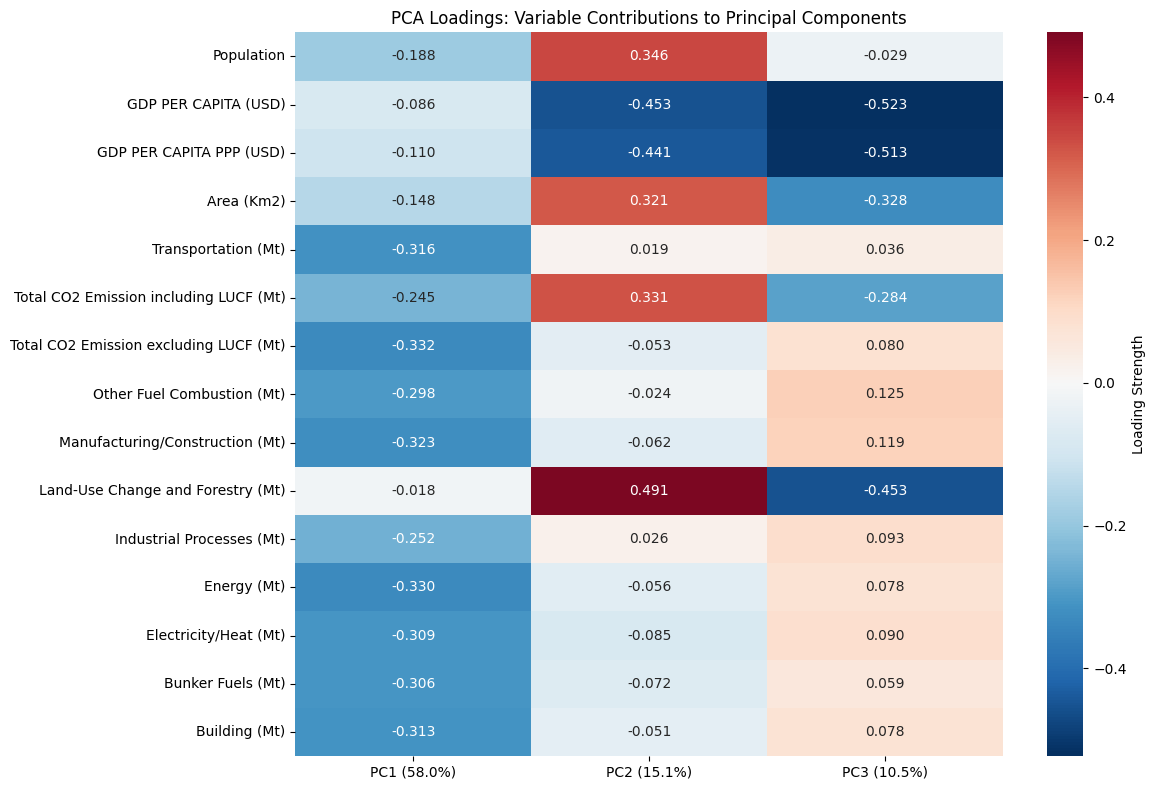

In [61]:
import matplotlib.pyplot as plt

# # 2D plot of first two components
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
# plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.1%} variance)')
# plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.1%} variance)')
# plt.title('PCA: PC1 vs PC2')
# plt.grid(True)
# plt.show()

# Create loadings heatmap
plt.figure(figsize=(12, 8))
loadings_df = pd.DataFrame(
    principal_components,
    index=pca_columns,
    columns=[f'PC{i+1} ({ev:.1%})' for i, ev in enumerate(explained_variance_ratio[:3])]
)

sns.heatmap(loadings_df,
            cmap='RdBu_r', center=0,
            annot=True, fmt='.3f',
            cbar_kws={'label': 'Loading Strength'})
plt.title('PCA Loadings: Variable Contributions to Principal Components')
plt.tight_layout()
plt.show()


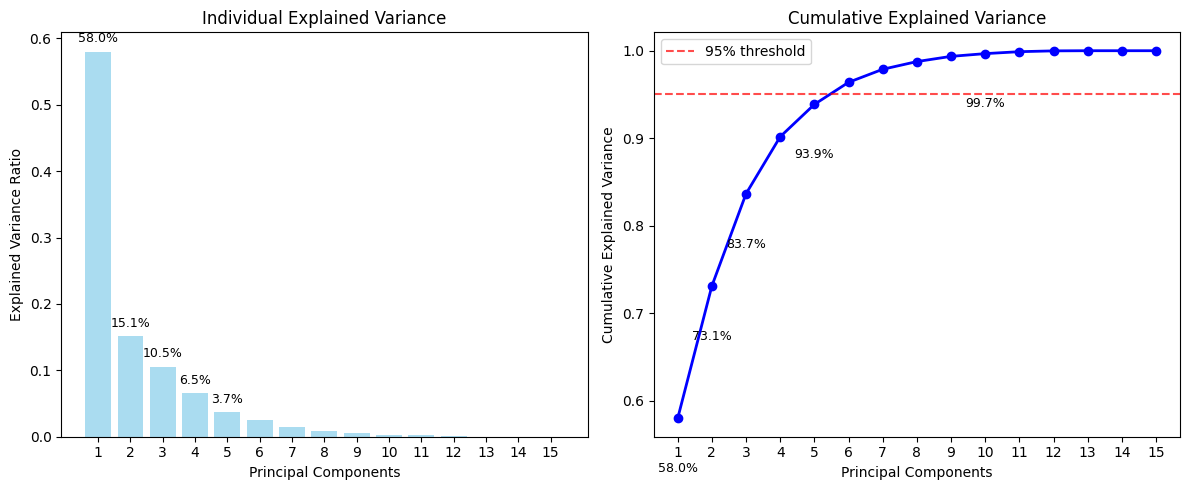

EXACT PERCENTAGES:
Individual explained variance:
  PC1: 0.580 (58.02%)
  PC2: 0.151 (15.12%)
  PC3: 0.105 (10.53%)
  PC4: 0.065 (6.51%)
  PC5: 0.037 (3.69%)
  PC6: 0.025 (2.52%)
  PC7: 0.015 (1.49%)
  PC8: 0.009 (0.88%)
  PC9: 0.006 (0.60%)
  PC10: 0.003 (0.31%)
  PC11: 0.002 (0.22%)
  PC12: 0.001 (0.09%)
  PC13: 0.000 (0.02%)
  PC14: 0.000 (0.00%)
  PC15: 0.000 (0.00%)

Cumulative explained variance:
  PC1: 0.580 (58.02%)
  PC2: 0.731 (73.13%)
  PC3: 0.837 (83.67%)
  PC4: 0.902 (90.18%)
  PC5: 0.939 (93.87%)
  PC6: 0.964 (96.39%)
  PC7: 0.979 (97.88%)
  PC8: 0.988 (98.76%)
  PC9: 0.994 (99.36%)
  PC10: 0.997 (99.67%)
  PC11: 0.999 (99.89%)
  PC12: 1.000 (99.98%)
  PC13: 1.000 (100.00%)
  PC14: 1.000 (100.00%)
  PC15: 1.000 (100.00%)


In [62]:
import matplotlib.pyplot as plt

# Create a simple scree plot with percentages
plt.figure(figsize=(12, 5))

# Plot 1: Individual explained variance with percentages
plt.subplot(1, 2, 1)
components = range(1, len(explained_variance_ratio) + 1)
bars = plt.bar(components, explained_variance_ratio, alpha=0.7, color='skyblue')

# Add percentage labels on top of bars for first few components
for i, (bar, ratio) in enumerate(zip(bars, explained_variance_ratio)):
    if i < 5:  # Label only first 5 components to avoid clutter
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{ratio:.1%}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance')
plt.xticks(components)

# Plot 2: Cumulative explained variance with percentages
plt.subplot(1, 2, 2)
plt.plot(components, cumulative_variance, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% threshold')

# Add percentage labels for some key points
for i, cum_var in enumerate(cumulative_variance):
    if i in [0, 1, 2, 4, 9]:  # Label specific components to avoid clutter
        plt.text(components[i], cumulative_variance[i] - 0.05,
                f'{cum_var:.1%}', ha='center', va='top', fontsize=9)

plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.xticks(components)

plt.tight_layout()
plt.show()

# Also print the exact numbers for clarity
print("EXACT PERCENTAGES:")
print("Individual explained variance:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"  PC{i}: {ratio:.3f} ({ratio:.2%})")

print("\nCumulative explained variance:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"  PC{i}: {cum_var:.3f} ({cum_var:.2%})")

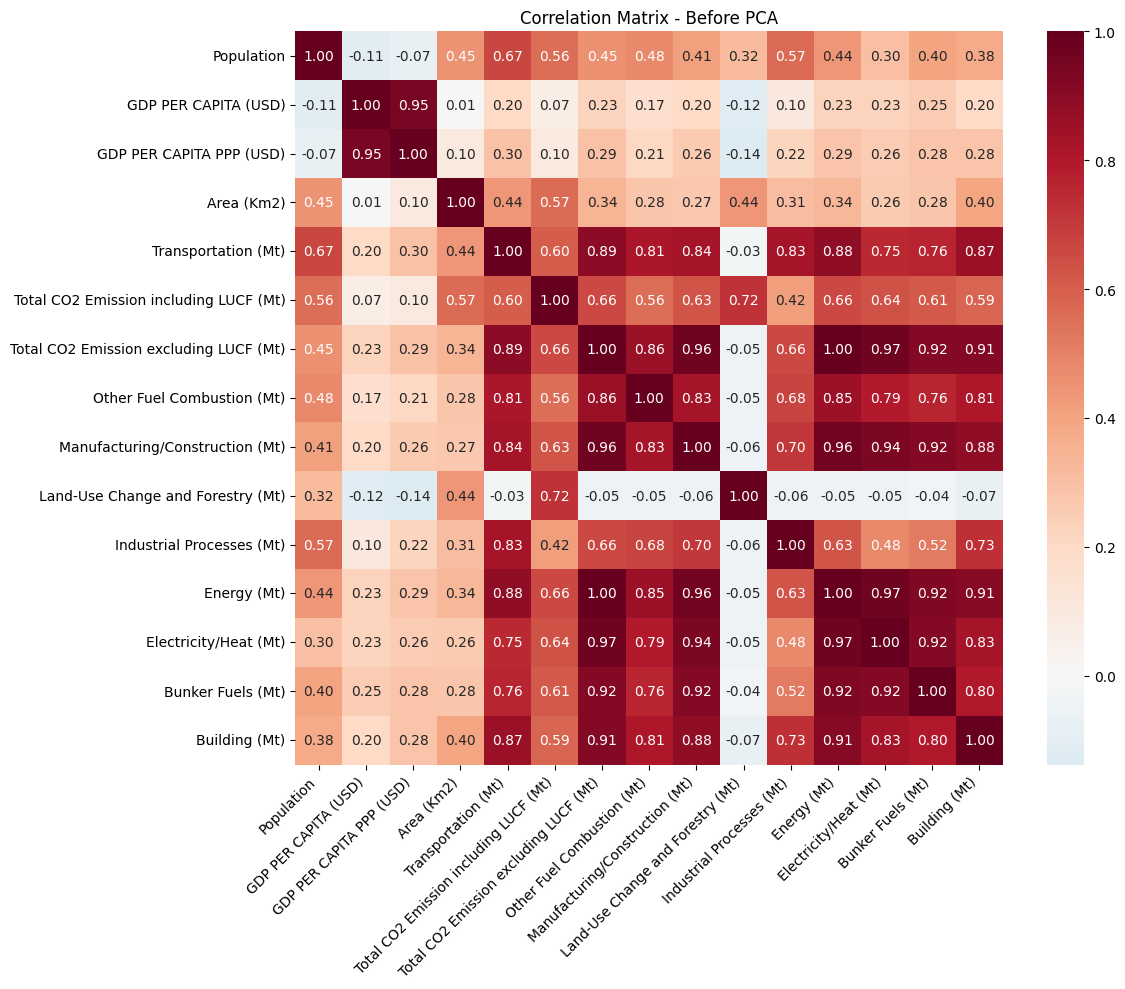

In [63]:
import seaborn as sns

# Plot correlation matrix of original standardized data which has a lot of redundancy and can't see clearly
plt.figure(figsize=(12, 10))
correlation_matrix = np.corrcoef(standardazed_data.T)
sns.heatmap(correlation_matrix,
            xticklabels=pca_columns,
            yticklabels=pca_columns,
            cmap='RdBu_r', center=0,
            annot=True, fmt='.2f')
plt.title('Correlation Matrix - Before PCA')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()